In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ad_data = pd.read_csv('advertisingREADY.csv')
ad_data

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Day,Hour,dayofweek,Clicked on Ad
0,0,68.95,0,0.261492,256.09,0,3,27,0,6,0
1,1,80.23,0,0.619863,193.77,1,4,4,1,0,0
2,2,69.47,2,0.150424,236.50,0,3,13,20,6,0
3,3,74.15,0,-0.119645,245.89,1,1,10,2,6,0
4,4,68.37,0,0.915334,225.58,0,6,3,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,0,0.779457,208.58,1,2,11,21,3,1
996,996,51.30,1,0.584086,134.42,1,4,22,2,4,1
997,997,51.63,1,-0.791622,120.37,1,2,1,17,0,1
998,998,55.55,2,-0.818463,187.95,0,3,24,2,3,0


In [3]:
ad_data.columns

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Month', 'Day', 'Hour', 'dayofweek',
       'Clicked on Ad'],
      dtype='object')

In [4]:
ad_data = ad_data.drop(['Unnamed: 0'], axis=1)

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Day,Hour,dayofweek,Clicked on Ad
0,68.95,0,0.261492,256.09,0,3,27,0,6,0
1,80.23,0,0.619863,193.77,1,4,4,1,0,0
2,69.47,2,0.150424,236.50,0,3,13,20,6,0
3,74.15,0,-0.119645,245.89,1,1,10,2,6,0
4,68.37,0,0.915334,225.58,0,6,3,3,4,0


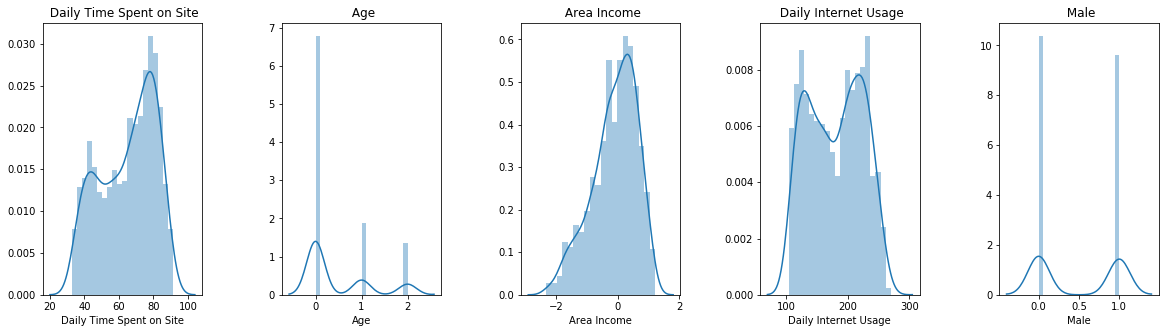

In [6]:
plt.figure(2, figsize = (20,5))
n = 0
for x in ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']:
    n += 1
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(ad_data[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()

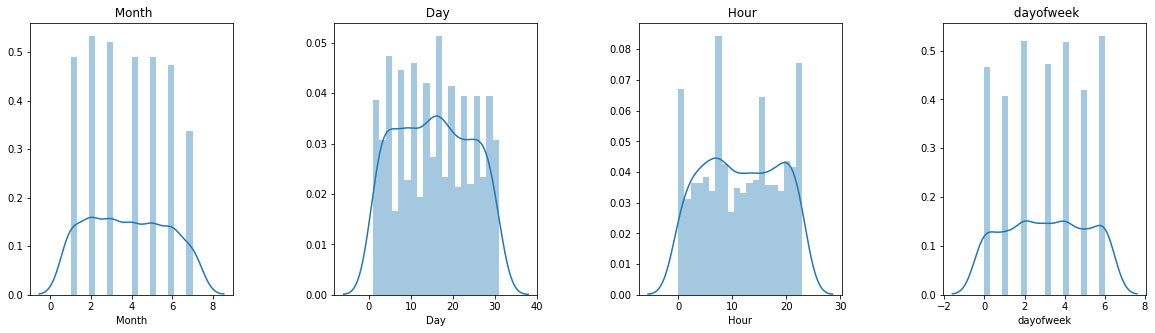

In [7]:
plt.figure(2, figsize = (20,5))
n = 0
for x in ['Month', 'Day', 'Hour', 'dayofweek']:
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(ad_data[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()

### Model Development

- Model pertama yang kita pakai pada dataset ini adalah Logistic Regression, karena model ini menggunakan variabel dependent yang binary yaitu pada fitur Clicked on Ad
<br>
<br>
- Decision Tree merupakan basic modeling pada klasifikasi, ada sedikit kekurangan jika datanya berubah sedikit hasilnya akan sangat jauh berbeda. Decision Tree juga besar resiko akan overfitting.
<br>
<br>
- Model ketiga yang dipakai adalah Random Forest, karena model ini sangat umum dipakai untuk modeling yang bertujuan klasifikasi, prediksi dll. Model ini juga bisa dibilang lanjutan dari Decision Tree.
<br>
<br>
- KNN atau K-Nearet Neighbour kita pakai di model selanjutnya yang merupakan basic model untuk klasifikasi yang tingkat akurasinya tinggi walaupun menggunakan memori yang banyak 

# Logistic Regression

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.model_selection import train_test_split

# Splitting dataset
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male', 'Month', 'Day', 'Hour', 'dayofweek']]
y = ad_data['Clicked on Ad']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

### Scaling Data

In [11]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

- Scalling data memakai Standard scaler untuk memaksa data untuk berdistribusi normal
- dengan data yang berdistribusi normal akan meningkatkan score model

In [12]:
from sklearn.linear_model import LogisticRegression

# Initiate and fit Logistic Regression Model
modelLR = LogisticRegression(solver='lbfgs')
modelLR.fit(X_train, y_train)

#Prediction
y_predLR = modelLR.predict(X_test)

In [13]:
print('\nConfusion Matrix:')
CMLR = confusion_matrix(y_test, y_predLR)
CMLR


Confusion Matrix:


array([[ 86,   2],
       [  7, 105]], dtype=int64)

- Dari score yang ditunjukan oleh confusion matrix jumlah prediksi yang akurat adalah <b>86 + 105 = 191</b>. dan jumlah prediksi yang tidak tepat adalah <b>2 + 7 = 9</b>. Dari jumlah nilai ini kita bisa asumsikan prediksi dari model ini cukup bagus

In [14]:
labels = ['Click', 'NoClick']

              precision    recall  f1-score   support

       Click       0.92      0.98      0.95        88
     NoClick       0.98      0.94      0.96       112

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



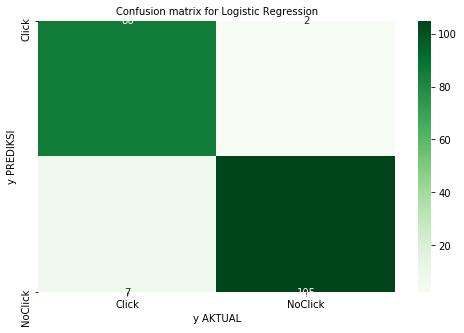

In [15]:
print(classification_report(y_test, y_predLR, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(CMLR, annot=True, fmt=".0f", cmap='Greens', ax=ax)
plt.title('Confusion matrix for Logistic Regression', y=1, size=10)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.xlabel("y AKTUAL")
plt.ylabel("y PREDIKSI")
plt.show()

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

# Prediction
y_predRF = modelRF.predict(X_test)

In [17]:
print('\nConfusion Matrix:')
CMRF = confusion_matrix(y_test, y_predRF)
CMRF


Confusion Matrix:


array([[ 85,   3],
       [  7, 105]], dtype=int64)

- Dari score yang ditunjukan oleh confusion matrix jumlah prediksi yang akurat adalah <b>86 + 105 = 191</b>. dan jumlah prediksi yang tidak tepat adalah <b>2 + 7 = 9</b>. Dari jumlah nilai ini kita bisa asumsikan prediksi dari model ini cukup bagus

In [18]:
labels = ['Click', 'NoClick']

              precision    recall  f1-score   support

       Click       0.92      0.97      0.94        88
     NoClick       0.97      0.94      0.95       112

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



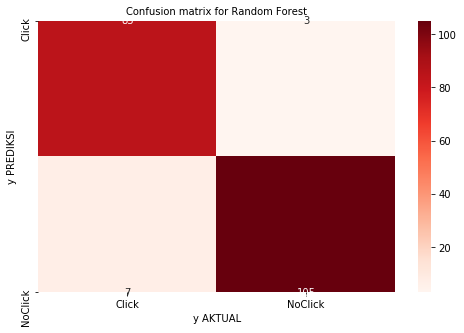

In [19]:
print(classification_report(y_test, y_predRF, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(CMRF, annot=True, fmt=".0f", cmap='Reds', ax=ax)
plt.title('Confusion matrix for Random Forest', y=1, size=10)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.xlabel("y AKTUAL")
plt.ylabel("y PREDIKSI")
plt.show()

## KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier


modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

# Prediction
y_predKNN = modelKNN.predict(X_test)

In [21]:
print('\nConfusion Matrix:')
CMKNN = confusion_matrix(y_test, y_predKNN)
CMKNN


Confusion Matrix:


array([[ 88,   0],
       [  9, 103]], dtype=int64)

- Dari score yang ditunjukan oleh confusion matrix jumlah prediksi yang akurat adalah <b>88 + 103 = 191</b>. dan jumlah prediksi yang tidak tepat adalah <b>0 + 9 = 9</b>. Dari jumlah nilai ini kita bisa asumsikan prediksi dari model ini cukup bagus

In [22]:
labels = ['Click', 'NoClick']

              precision    recall  f1-score   support

       Click       0.91      1.00      0.95        88
     NoClick       1.00      0.92      0.96       112

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



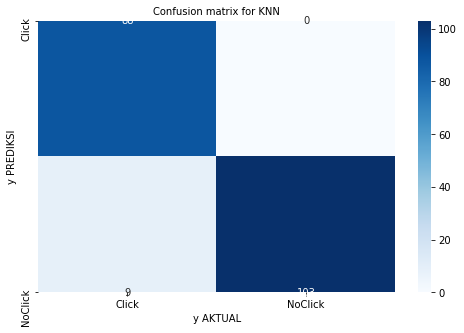

In [23]:
print(classification_report(y_test, y_predKNN, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(CMKNN, annot=True, fmt=".0f", cmap='Blues', ax=ax)
plt.title('Confusion matrix for KNN', y=1, size=10)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.xlabel("y AKTUAL")
plt.ylabel("y PREDIKSI")
plt.show()

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)

# Prediction
y_predDT = modelDT.predict(X_test)

In [25]:
print('\nConfusion Matrix:')
CMDT = confusion_matrix(y_test, y_predDT)
CMDT


Confusion Matrix:


array([[ 84,   4],
       [  7, 105]], dtype=int64)

- Dari score yang ditunjukan oleh confusion matrix jumlah prediksi yang akurat adalah <b>84 + 106 = 190</b>. dan jumlah prediksi yang tidak tepat adalah <b>4 + 6 = 10</b>. Dari jumlah nilai ini kita bisa asumsikan prediksi dari model ini cukup bagus

In [26]:
labels = ['Click', 'NoClick']

              precision    recall  f1-score   support

       Click       0.92      0.95      0.94        88
     NoClick       0.96      0.94      0.95       112

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



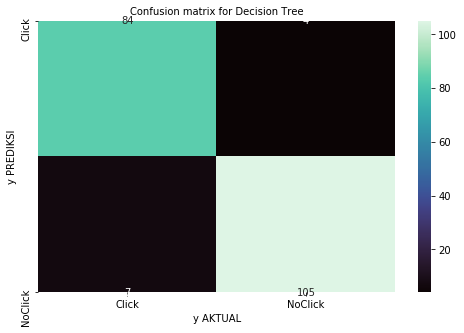

In [27]:
print(classification_report(y_test, y_predDT, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(CMDT, annot=True, fmt=".0f", cmap='mako', ax=ax)
plt.title('Confusion matrix for Decision Tree', y=1, size=10)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.xlabel("y AKTUAL")
plt.ylabel("y PREDIKSI")
plt.show()

# Compare Models

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [29]:
f1_scoreLR = f1_score(y_test, y_predLR)
f1_scoreRF = f1_score(y_test, y_predRF)
f1_scoreKNN = f1_score(y_test, y_predKNN)
f1_scoreDT = f1_score(y_test, y_predDT)

precision_scoreLR = precision_score(y_test, y_predLR)
precision_scoreRF = precision_score(y_test, y_predRF)
precision_scoreKNN = precision_score(y_test, y_predKNN)
precision_scoreDT = precision_score(y_test, y_predDT)

recall_scoreLR = recall_score(y_test, y_predLR)
recall_scoreRF = recall_score(y_test, y_predRF)
recall_scoreKNN = recall_score(y_test, y_predKNN)
recall_scoreDT = recall_score(y_test, y_predDT)

accuracy_scoreLR = accuracy_score(y_test, y_predLR)
accuracy_scoreRF = accuracy_score(y_test, y_predRF)
accuracy_scoreKNN = accuracy_score(y_test, y_predKNN)
accuracy_scoreDT = accuracy_score(y_test, y_predDT)

XYtrain_scoreLR = modelLR.score(X_train, y_train)
XYtrain_scoreRF = modelRF.score(X_train, y_train)
XYtrain_scoreKNN = modelKNN.score(X_train, y_train)
XYtrain_scoreDT = modelDT.score(X_train, y_train)

XYtest_scoreLR = modelLR.score(X_test, y_test)
XYtest_scoreRF = modelRF.score(X_test, y_test)
XYtest_scoreKNN = modelKNN.score(X_test, y_test)
XYtest_scoreDT = modelDT.score(X_test, y_test)



scores = {'Model': ['Logistic Regression', 'Random Forest', 'KNearestNeighbors', 'Decision Tree'],
          'XY Test Model Score' :[XYtest_scoreLR, XYtest_scoreRF, XYtest_scoreKNN, XYtest_scoreDT],
          'XY Train Model Score' : [XYtrain_scoreLR, XYtrain_scoreRF, XYtrain_scoreKNN, XYtrain_scoreDT],
          'Precision Score': [precision_scoreLR, precision_scoreRF, precision_scoreKNN, precision_scoreDT],
         'Recall Score' : [recall_scoreLR, recall_scoreRF, recall_scoreKNN, recall_scoreDT],
          'f1 Score' : [f1_scoreLR, f1_scoreRF, f1_scoreKNN, f1_scoreDT],
         'Accuracy Score' : [accuracy_scoreLR, accuracy_scoreRF, accuracy_scoreKNN, accuracy_scoreDT]}

model_compare = pd.DataFrame(scores, columns=['Model', 'XY Test Model Score', 'XY Train Model Score', 'Precision Score', 'Recall Score', 'f1 Score', 'Accuracy Score'])
model_compare

,Model,XY Test Model Score,XY Train Model Score,Precision Score,Recall Score,f1 Score,Accuracy Score
0,Logistic Regression,0.955,0.96625,0.981308,0.937500,0.958904,0.955
1,Random Forest,0.950,1.00000,0.972222,0.937500,0.954545,0.950
2,KNearestNeighbors,0.955,0.95500,1.000000,0.919643,0.958140,0.955
3,Decision Tree,0.945,1.00000,0.963303,0.937500,0.950226,0.945


- Dari komparasi ini bisa kita ambil kesimpulan yaitu:
1. Kalau kita lihat dari fitur XY Test dan XY train untuk mengecek under atau overfitting. Tidak ada satupun dari 4 model yang under atau over fitting karena semua nilai score dari masing masing model berdekatan.
2. Semua model bisa dibilang bagus mungkin juga karena datasetnya sudah bagus bisa dilihat salah satunya tidak adanya missing value ataupun NaN
3. Dari 4 model ini kita ambil 2 yang paling bagus berdasarkan f1 score yaitu Logistic Regression dan Random Forest
4. Kenapa kita lihat dari f1 score karena f1 score merupakan rata rata dari precision dan recall score

# Find Best Parameters

### Hyperparameters for Logistic Regression

menggunakan Grid Search meskipun memakan waktu agak lama tapi parameter yang didapat lebih akurat

In [30]:
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

LRparam = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}

In [31]:
modelLR_GS = LogisticRegression()
modelLR_GS = GridSearchCV(
    modelLR_GS, LRparam, cv = 5)

In [32]:
modelLR_GS.fit(X_train, y_train)
modelLR_GS.best_params_

{'max_iter': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [33]:
BestModelLR = LogisticRegression(solver='liblinear', penalty = 'l2', max_iter = 10)
BestModelLR.fit(X_train, y_train)

# Prediction
y_predBestLR = BestModelLR.predict(X_test)

### Hyperparameters for Random Forest

In [34]:
max_depth = [10, 100, 1000]
min_samples_leaf = [100, 1000, 10000]
min_samples_split = [100, 200, 500]
n_estimators = [100, 200, 500]

RFparam = {'max_depth' : max_depth, 'min_samples_leaf': min_samples_leaf, 
             'min_samples_split' : min_samples_split, 'n_estimators' : n_estimators}

In [35]:
modelRF_GS = RandomForestClassifier()
modelRF_GS = GridSearchCV(
    modelRF_GS, RFparam, cv = 5)

In [36]:
modelRF_GS.fit(X_train, y_train)
modelRF_GS.best_params_

{'max_depth': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 500}

In [37]:
BestModelRF = RandomForestClassifier(max_depth= 1000, min_samples_leaf= 100, min_samples_split= 100, n_estimators= 200)
BestModelRF.fit(X_train, y_train)

# Prediction
y_predBestRF = BestModelRF.predict(X_test)

# Compare model after using Hyperparameter

In [38]:
Bestf1_scoreLR = f1_score(y_test, y_predBestLR)
Bestf1_scoreRF = f1_score(y_test, y_predBestRF)

Bestprecision_scoreLR = precision_score(y_test, y_predBestLR)
Bestprecision_scoreRF = precision_score(y_test, y_predBestRF)

Bestrecall_scoreLR = recall_score(y_test, y_predBestLR)
Bestrecall_scoreRF = recall_score(y_test, y_predBestRF)

Bestaccuracy_scoreLR = accuracy_score(y_test, y_predBestLR)
Bestaccuracy_scoreRF = accuracy_score(y_test, y_predBestRF)

BestXYtrain_scoreLR = BestModelLR.score(X_train, y_train)
BestXYtrain_scoreRF = BestModelRF.score(X_train, y_train)

BestXYtest_scoreLR = BestModelLR.score(X_test, y_test)
BestXYtest_scoreRF = BestModelRF.score(X_test, y_test)


scores = {'Model': ['Logistic Regression', 'Random Forest'],
          'Best XY Test Model Score' :[BestXYtest_scoreLR, BestXYtest_scoreRF],
          'Best XY Train Model Score' : [BestXYtrain_scoreLR, BestXYtrain_scoreRF],
          'Best Precision Score': [Bestprecision_scoreLR, Bestprecision_scoreRF],
         'Best Recall Score' : [Bestrecall_scoreLR, Bestrecall_scoreRF],
          'Best f1 Score' : [Bestf1_scoreLR, Bestf1_scoreRF],
         'Best Accuracy Score' : [Bestaccuracy_scoreLR, Bestaccuracy_scoreRF]}

Bestmodel_compare = pd.DataFrame(scores, columns=['Model', 'Best XY Test Model Score', 'Best XY Train Model Score', 'Best Precision Score', 'Best Recall Score', 'Best f1 Score', 'Best Accuracy Score'])
Bestmodel_compare

,Model,Best XY Test Model Score,Best XY Train Model Score,Best Precision Score,Best Recall Score,Best f1 Score,Best Accuracy Score
0,Logistic Regression,0.955,0.97000,0.981308,0.937500,0.958904,0.955
1,Random Forest,0.920,0.93375,0.936364,0.919643,0.927928,0.920


In [39]:
model_compare = model_compare.drop(index =[2, 3])
model_compare

,Model,XY Test Model Score,XY Train Model Score,Precision Score,Recall Score,f1 Score,Accuracy Score
0,Logistic Regression,0.955,0.96625,0.981308,0.9375,0.958904,0.955
1,Random Forest,0.950,1.00000,0.972222,0.9375,0.954545,0.950


- Dari score diatas yang paling bagus adalah Logistic Regression yang paling stabil. dalam kasus ini kita predik pengunjung yang mengklik
- Rata rata score pada saat di hyperparameter malah turun, tapi itu bagus karena pengecualian untuk kasus ini semua scorenya diatas 0.90, kita lebih memilih yang tidak terlalu tinggi untuk menghindari over fitting pada model
- Kita ambil Logistic regression sebagai best model karena score pada fitur Random Forest ada yang bernilai 1

### Confusion matrix dan calculation report for best model

In [40]:
print('\nConfusion Matrix:')
BestCMLR = confusion_matrix(y_test, y_predBestLR)
BestCMLR


Confusion Matrix:


array([[ 86,   2],
       [  7, 105]], dtype=int64)

In [41]:
labels = ['Click', 'NoClick']

              precision    recall  f1-score   support

       Click       0.92      0.98      0.95        88
     NoClick       0.98      0.94      0.96       112

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



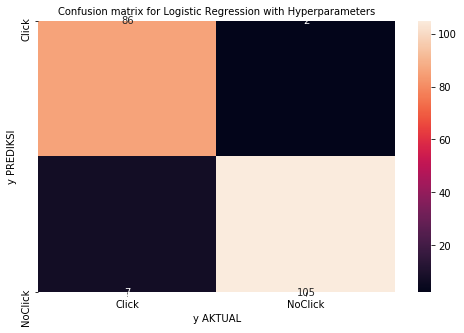

In [42]:
print(classification_report(y_test, y_predBestLR, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(BestCMLR, annot=True, fmt=".0f", ax=ax)
plt.title('Confusion matrix for Logistic Regression with Hyperparameters', y=1, size=10)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.xlabel("y AKTUAL")
plt.ylabel("y PREDIKSI")
plt.show()

# Logistic Regression Variable Importance

In [43]:
columns = X.columns
train = pd.DataFrame(np.atleast_2d(X_train), columns=columns)

In [44]:
feature_importances = pd.DataFrame(BestModelRF.feature_importances_,
                                   index = train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances.head(10)

,index,importance
0,Daily Internet Usage,0.521107
1,Daily Time Spent on Site,0.336176
2,Area Income,0.093496
3,Age,0.024396
4,Hour,0.008844
5,dayofweek,0.005655
6,Male,0.004161
7,Day,0.003701
8,Month,0.002463


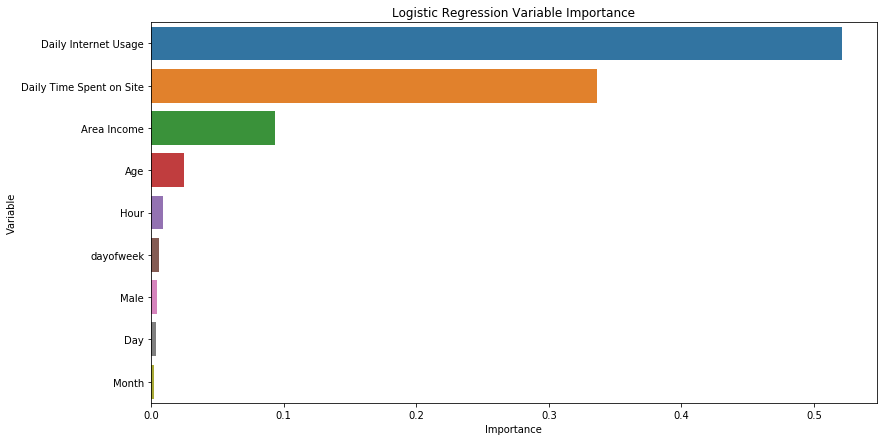

In [45]:
plt.figure(figsize=(13, 7))
sns.barplot(
    x="importance", y='index',
    data=feature_importances[0:10], label="Total"
)
plt.title("Logistic Regression Variable Importance")
plt.ylabel("Variable")
plt.xlabel("Importance")
plt.show()

In [46]:
weekday_counts = pd.crosstab(ad_data["Clicked on Ad"], ad_data["dayofweek"])
weekday_counts.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_day = weekday_counts.transpose().reset_index()
df_day.columns = ['Day', 'Not Clicked', 'Clicked']
df_day

,Day,Not Clicked,Clicked
0,Mon,68,72
1,Tue,67,55
2,Wed,77,79
3,Thu,63,79
4,Fri,84,71
5,Sat,62,64
6,Sun,79,80


In [47]:
hour_counts = pd.crosstab(ad_data["Clicked on Ad"], ad_data["Hour"])
df_hour = hour_counts.transpose()
df_hour.columns = ['Not Clicked', 'Clicked']
df_hour

,Not Clicked,Clicked
Hour,,
0,19,26
1,16,16
2,19,17
3,19,23
4,21,21
5,23,21
6,16,23
7,28,26
8,22,21


# Final model from the best feature

### Splitting data

In [48]:
Xfinal = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Hour', 'dayofweek']]
yfinal = ad_data['Clicked on Ad']

In [49]:
Xfinal_train, Xfinal_test, yfinal_train, yfinal_test = train_test_split(Xfinal, yfinal, test_size=0.20, shuffle=False)

### Scaling data

In [50]:
standardScaler = StandardScaler()
Xfinal_train = standardScaler.fit_transform(Xfinal_train)
Xfinal_test = standardScaler.transform(Xfinal_test)

In [51]:
FinalModelLR = LogisticRegression()
FinalModelLR.fit(Xfinal_train, yfinal_train)

# Prediction
yfinal_predLR = FinalModelLR.predict(Xfinal_test)

In [52]:
print('\nConfusion Matrix:')
FinalCMLR = confusion_matrix(yfinal_test, yfinal_predLR)
FinalCMLR


Confusion Matrix:


array([[ 86,   2],
       [  7, 105]], dtype=int64)

In [53]:
labels = ['Click', 'NoClick']

              precision    recall  f1-score   support

       Click       0.92      0.98      0.95        88
     NoClick       0.98      0.94      0.96       112

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



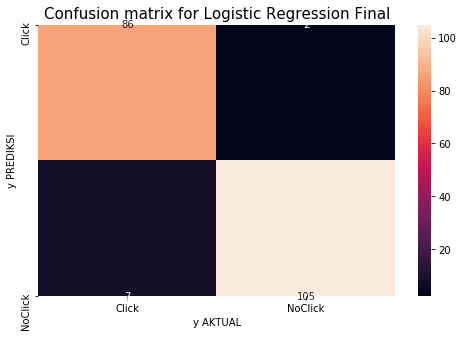

In [54]:
print(classification_report(yfinal_test, yfinal_predLR, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(FinalCMLR, annot=True, fmt=".0f", ax=ax)
plt.title('Confusion matrix for Logistic Regression Final', y=1, size=15)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.xlabel("y AKTUAL")
plt.ylabel("y PREDIKSI")
plt.show()

In [55]:
Finalf1_scoreLR = f1_score(yfinal_test, yfinal_predLR)

Finalprecision_scoreLR = precision_score(yfinal_test, yfinal_predLR)

Finalrecall_scoreLR = recall_score(yfinal_test, yfinal_predLR)

Finalaccuracy_scoreLR = accuracy_score(yfinal_test, yfinal_predLR)

FinalXYtrain_scoreLR = FinalModelLR.score(Xfinal_train, yfinal_train)

FinalXYtest_scoreLR = FinalModelLR.score(Xfinal_test, yfinal_test)

print('Final Score XY Test Score:', FinalXYtest_scoreLR)
print('Final Score XY Train Score:', FinalXYtrain_scoreLR)
print('Final Precision Score:', Finalprecision_scoreLR)
print('Final Recall Score:', Finalrecall_scoreLR)
print('Final f1 Score:', Finalf1_scoreLR)
print('Final Accuracy Score:', Finalaccuracy_scoreLR)

Final Score XY Test Score: 0.955
Final Score XY Train Score: 0.96375
Final Precision Score: 0.9813084112149533
Final Recall Score: 0.9375
Final f1 Score: 0.958904109589041
Final Accuracy Score: 0.955


## Conclusions

untuk sementara Logistic Regression adalah model yang terbaik yang punya nilai precision yang bagus. Tidak memrlukan waktu yang banyak untuk mem-fit ke model, yang berarti untuk mencari best parameter juga akan cepat. Mengapa nila score dari dataset ini bagus karena tidak ada mising value dan juga mempunyai outlier yang sedikit. Sebenarnya masih banyak metode dan hal lain yang dapat kita coba.
<br>
<br>
Kita rangkum score dari model terakhir ini
1. model ini tidak under maupun over kalu diliat dari score XY train dan test
2. mempunyai tingkat akurasi yang tinggi yaitu 95,5% | (TP+TN/TP+TN+FP+FN)
3. score pada precision 97,7% | (TP/TP+FP)
4. Recall pada model ini 92,4% | (TP/TP+FN) yang berarti menentukan berapa persen yang diprediksi klik dibandingkan keseluruhan pasien yang sebenarnya klik.

Penjelasan TP, FP, FN, TN:
- TP = 11 mempredik pengunjung yang benar benar meng-klik
- FP = 01 mempredik pengunjung yang meng-klik tapi sebenarnya tidak meng-klik
- TN = 00 mempredik pengunjung yang benar benar tidak meng-klik
- FN = 10 mempredik pengunjung yang tidak meng-klik tapi sebenarnya meng-klik
- TP+FN = pengunjung yang benar benar meng-klik 86 + 7 = 93
- FP+TN = pengunjung yang benar benar tidak meng-klik 2 + 105 = 107
- TP+FP = prediksi pengunjung yang meng-klik 86 + 2 = 88
- FN+TN = prediksi pengunjung yang tidak meng-klik 7 + 105 = 112
<br>
<br>
Dilihat dari fitur importance-nya yang mempengaruhi orang pengunjung website untuk mengklik ad adalah Daily Time Spent on Site, Age, Area Income,Daily Internet Usage, Hour, Day<br>
Kalau kita telaah lebih lanjut dari fitur dayofweek kita bisa ambil kesimpulan setiap harinya pengunjung yang klik dan tidak klik tidak berbeda jauh, dan setiap harinya pula pengunjung yang klik lebih banyak daripada yang tidak kecuali di hari selasa dan jumat.<br>
Sedangkan dari fitur Hour yang kita dapat adalah tidak ada pattern yang menggambarkan range jam berapa saja yang sering kali diklik
<br>
<br>
Dataset ini adalah milik dari suatu perusahaan Digital Agency. Kalau kita lihat dari segi bisnis yang perlu diperhatikan dari confusion matrix kita adalah tingkat FN yang berarti kalau tingakat FN-nya tinggi akan merugikan perusahaan. Artinya data yang kita keluarkan untuk bukti ke client tidak akurat dan akan merugikan perusahaan. Perusahaan akan tidak dipercaya karena tingat kliknya rendah kualitas iklan kita tidak dapat mengkait pengunjung website

In [56]:
import joblib

model = LogisticRegression()
model.fit(Xfinal_train, yfinal_train)

joblib.dump(model, 'ModelJoblib')

['ModelJoblib']

In [57]:
# print(model_pred.predict([[1, 2, 3, 4, 5, 1, 9, 0, 4, 1, 0]]))